# SENTIMENT ANALYSIS USING MACHINE LEARNING

We will be classifying the tweets into positive or negative sentiments.

### What is Twitter Sentiment Analysis?

Twitter sentiment analysis analyzes the sentiment or emotion of tweets. It uses natural language processing and machine learning algorithms to classify tweets automatically as positive, negative, or neutral based on their content. It can be done for individual tweets or a larger dataset related to a particular topic or event.

### Why is Twitter Sentiment Analysis Important?
* **Understanding Customer Feedback:** By analyzing the sentiment of customer feedback, companies can identify areas where they need to improve their products or services.
* **Reputation Management:** Sentiment analysis can help companies monitor their brand reputation online and quickly respond to negative comments or reviews.
* **Political Analysis:** Sentiment analysis can help political campaigns understand public opinion and tailor their messaging accordingly.
* **Crisis Management:** In the event of a crisis, sentiment analysis can help organizations monitor social media and news outlets for negative sentiment and respond appropriately.
* **Marketing Research:** Sentiment analysis can help marketers understand consumer behavior and preferences, and develop targeted advertising campaigns.


#### Twitter Sentiment Analysis: Project Pipeline
The various steps involved in the Machine Learning Pipeline are:

* Import Necessary Dependencies
* Read and Load the Dataset
* Exploratory Data Analysis
* Data Visualization of Target Variables
* Data Preprocessing
* Splitting our data into Train and Test sets.
* Transforming Dataset using TF-IDF Vectorizer
* Function for Model Evaluation
* Model Building
* Model Evaluation

#### Importing the Libraries

In [1]:
import re
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/My Drive'

In [ ]:
import os

In [ ]:
files = os.listdir(data_path)
# Load a specific file (e.g., a CSV file)
import pandas as pd
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(os.path.join(data_path, 'sentiment_analysis_data.csv'),encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

### DATASET

**Context**
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

**Content**
It contains the following 6 fields:

* **target:** the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

* **ids:** The id of the tweet ( 2087)

* **date:** the date of the tweet (Sat May 16 23:58:44 UTC 2009)

* **flag:** The query (lyx). If there is no query, then this value is NO_QUERY.

* **user:** the user that tweeted (robotickilldozr)

* **text:** the text of the tweet (Lyx is cool)

#### Importing the dataset

In [ ]:
df1=df.copy()

In [ ]:
df2=df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


#### Null Value Treatment

In [ ]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

#### Checking target distribution

In [ ]:
df['target'].value_counts(normalize=True)

0    0.5
4    0.5
Name: target, dtype: float64

#### Seperating Categorical and numerical columns

In [ ]:
numerical_columns = df.select_dtypes(include=np.number)
categorical_columns = df.select_dtypes(exclude=np.number)

In [ ]:
categorical_columns.head()

,date,flag,user,text
0,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
categorical_columns['Day'] = categorical_columns['date'].str[:3]

In [ ]:
categorical_columns.head()

,date,flag,user,text,Day
0,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon
1,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Mon
2,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Mon
3,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Mon
4,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Mon


In [ ]:
categorical_columns.drop('date',axis=1,inplace=True)


In [ ]:
categorical_columns.head()

,flag,user,text,Day
0,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon
1,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Mon
2,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Mon
3,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Mon
4,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Mon


In [ ]:
categorical_columns['flag'].value_counts()

NO_QUERY    1600000
Name: flag, dtype: int64

As per the analysis we found that column 'FLAG' only have 1 unique value, thats why we found it irrelevant for our analysis


#### As per the analysis other than the Day, count(user) and  the textcolumn, no other column will impact the target.

In [ ]:
a=categorical_columns.groupby('Day')['user'].nunique()

<Axes: xlabel='Day'>

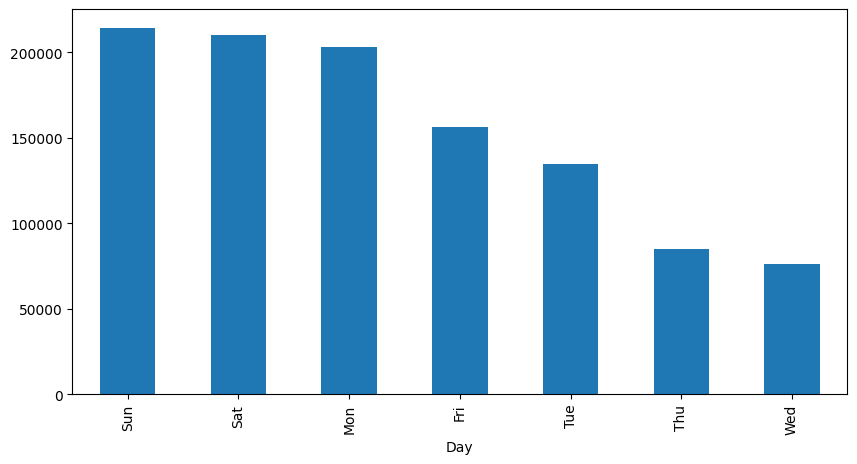

In [ ]:
a.sort_values(ascending=False).plot.bar(figsize = (10,5))

From the above chart we can see on sundays,saturdays and mondays people tweet more.
It shows the weekend effect on the users..

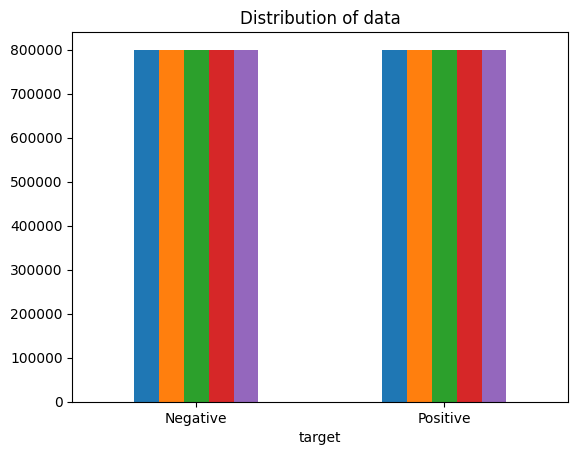

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

<Axes: xlabel='target', ylabel='count'>

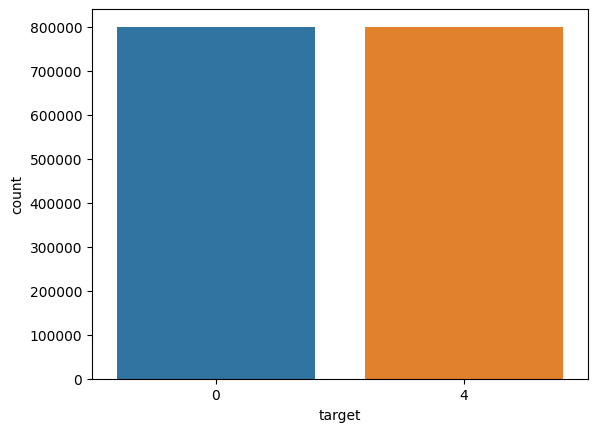

In [ ]:
sns.countplot(x='target', data=df)

In [ ]:
df['target'].unique()

array([0, 4])


####  Data Preprocessing
Before training the model, we perform various pre-processing steps on the dataset that mainly deals with removing stopwords, removing special characters like emojis, hashtags, etc. The text document is then converted into lowercase for better generalization.

Subsequently, the punctuations are cleaned and removed, thereby reducing the unnecessary noise from the dataset. After that, we also remove the repeating characters from the words along with removing the URLs as they do not have any significant importance.

At last, we then perform Stemming(reducing the words to their derived stems) and Lemmatization(reducing the derived words to their root form, known as lemma) for better results.

In [ ]:
##Selecting the text and Target column for our further analysis
data=df[['text','target']]
##Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)

data['target'] = data['target'].replace(4,1)

##Separating positive and negative tweets

data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

##Taking one-fourth of the data so we can run it on our machine easily

data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
## Combining positive and negative tweets

dataset = pd.concat([data_pos, data_neg])

## Making statement text in lowercase

dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

<ipython-input-29-e2ccd20cd16d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

#### Stop Words Removal


Stop words removal in NLP is the process of filtering out common and uninformative words like "the," "and," and "is" from text data. This step reduces noise, enhances efficiency, and improves interpretability in text analysis. By eliminating stop words, NLP models can focus on content words, leading to better results in tasks such as text classification, topic modeling, and information retrieval. 

In [ ]:
dataset.head()

,text,target
800000,i love @health4uandpets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@darealsunisakim thanks for the twitter add, s...",1
800003,being sick can be really cheap when it hurts t...,1
800004,@lovesbrooklyn2 he has that effect on everyone,1


In [ ]:
dataset.shape

(40000, 2)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_list= stopwords.words('english')

In [ ]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [ ]:
dataset['text']=dataset['text'].apply(remove_stopwords)

#### Cleaning and removing punctuations

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()


19995     much time   weekend work trip  malmï¿½ frisat...
19996                                   one  day  holidays
19997                feeling   right    hate  damn humprey
19998    geezi hv  read  whole book  personality types ...
19999     threw  sign  donnie   bent   get       thinge...
Name: text, dtype: object

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995     much time   weekend work trip  malmï¿½ frisat...
19996                                   one  day  holidays
19997                feeling   right    hate  damn humprey
19998    geezi hv  read  whole book  personality types ...
19999     threw  sign  donnie   bent   get       thinge...
Name: text, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995     much time   weekend work trip  malmï¿½ frisat...
19996                                   one  day  holidays
19997                feeling   right    hate  damn humprey
19998    geezi hv  read  whole book  personality types ...
19999     threw  sign  donnie   bent   get       thinge...
Name: text, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995     much time   weekend work trip  malmï¿½ frisat...
19996                                   one  day  holidays
19997                feeling   right    hate  damn humprey
19998    geezi hv  read  whole book  personality types ...
19999     threw  sign  donnie   bent   get       thinge...
Name: text, dtype: object

#### Applying lemmatizer

Lemmatization and stemming are NLP techniques for word normalization. Lemmatization reduces words to their base forms, ensuring valid words based on context and part of speech (e.g., "running" -> "run"). Stemming simplifies words by chopping prefixes and suffixes, but may generate non-words (e.g., "running" -> "run"). Lemmatization is linguistically accurate, retaining meaning, and is suitable for tasks like sentiment analysis. Stemming is faster and suits applications prioritizing efficiency, like search engines. The choice depends on the NLP task's trade-off between linguistic accuracy and computational speed.

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lemmatizer.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


800000                   love healthuandpets u guys r  best
800001    im meeting   one   besties tonight cant wait  ...
800002    darealsunisakim thanks   twitter add sunisa  g...
800003     sick   really cheap   hurts  much  eat real f...
800004                    lovesbrooklyn    effect  everyone
Name: text, dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 800000 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   target  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


In [ ]:
dataset['target'].unique()

array([1, 0])

#### Separating input feature and label

In [ ]:
x=dataset.text
y=dataset.target

In [ ]:
x.head()

In [ ]:
y.head()

#### Splitting Our Data Into Train and Test Subsets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.05, random_state =26105111)

In [ ]:
X_train.shape

(38000,)

In [ ]:
X_test.shape

(2000,)

In [ ]:
y_train.shape

(38000,)

In [ ]:
y_test.shape

(2000,)

### Bag of words 

**Bag of Words (BoW)** is a fundamental concept in natural language processing (NLP) for text representation and analysis:

* **Word Frequency:** BoW represents a document as a collection of words without considering their order or grammar, focusing solely on word frequency.
* **Vocabulary:** It creates a vocabulary of unique words in the corpus, and each document is represented as a vector where each dimension corresponds to a word from the vocabulary.
* **Count-Based:** Each dimension in the document vector represents the count of how many times a word appears in the document.
* **Sparse Matrix:** BoW often results in a sparse matrix, where most elements are zero, as not all words in the vocabulary are present in each document.
* **Versatility:** BoW is used in various NLP tasks, such as text classification, sentiment analysis, and information retrieval, but it ignores word order and semantics.

In [ ]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
toNumeric = CountVectorizer()

In [ ]:
#Get the vocabulary(unique words) from training data
toNumeric.fit(X_train)

CountVectorizer()

In [ ]:
# Test the created vocabulary
feature_names = toNumeric.get_feature_names_out()

In [ ]:
# Convert training data into a 'document-term matrix'
sampleTrain_dtm = toNumeric.transform(X_train)
sampleTrain_dtm

<38000x48816 sparse matrix of type '<class 'numpy.int64'>'
	with 286698 stored elements in Compressed Sparse Row format>

In [ ]:
# Let's convert sparse matrix to a dense matrix
sampleTrain_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
xtrain=pd.DataFrame(sampleTrain_dtm.toarray(), columns=feature_names)

In [ ]:
sampleTest_dtm = toNumeric.transform(X_test)
sampleTest_dtm

<2000x48816 sparse matrix of type '<class 'numpy.int64'>'
	with 13441 stored elements in Compressed Sparse Row format>

In [ ]:
sampleTest_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
xtest=pd.DataFrame(sampleTest_dtm.toarray(), columns=feature_names)

In [ ]:
xtrain.shape

(38000, 48816)

In [ ]:
xtest.shape

(2000, 48816)

In [ ]:
y_train.shape

(38000,)

In [ ]:
y_test.shape

(2000,)

### Machine Learning Models

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(xtrain, y_train)

MultinomialNB()

In [ ]:
y_pred_class = nb.predict(xtest)

In [ ]:
# Accuracy calculation
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.732

In [ ]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[778, 213],
       [323, 686]])

In [ ]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(xtrain, y_train)

In [79]:
y_pred_dt_class = decision_tree_classification.predict(xtest)

In [80]:
metrics.accuracy_score(y_test, y_pred_dt_class)

0.6755

In [81]:
metrics.confusion_matrix(y_test, y_pred_dt_class)

array([[705, 286],
       [363, 646]])

In [82]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(xtrain, y_train)

In [83]:
y_pred_rf_class = rf_classification.predict(xtest)

In [84]:
metrics.confusion_matrix(y_test, y_pred_rf_class)

array([[757, 234],
       [383, 626]])

In [85]:
metrics.accuracy_score(y_test, y_pred_rf_class)

0.6915